# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Read The Data

In [2]:
train=pd.read_csv('train_ctrUa4K.csv')

In [3]:
test=pd.read_csv('test_lAUu6dG.csv')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train.shape

(614, 13)

In [7]:
test.shape

(367, 12)

In [8]:
train_og=train.copy() #made a copy so we can use the orignal data for data modeling and also we won't loose our data
test_og=test.copy()

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA and Visualization

In [12]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [13]:
train['Loan_Status'].value_counts(normalize=True)  #normalize will set a propotion instead of a number

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

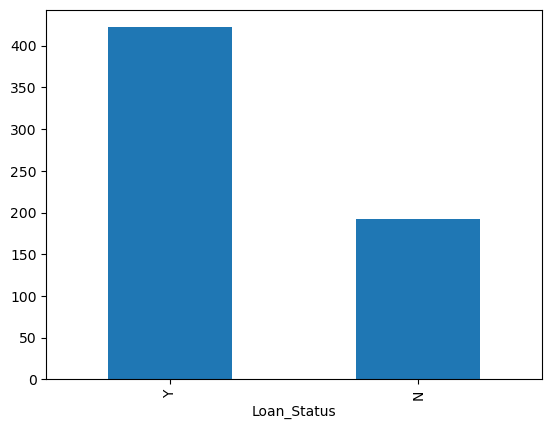

In [14]:
train['Loan_Status'].value_counts().plot.bar()

- Out of 614 loan applications, 422 were approved. This means approximately 69% of the total applications were successful.

<Axes: title={'center': 'Married'}, xlabel='Married'>

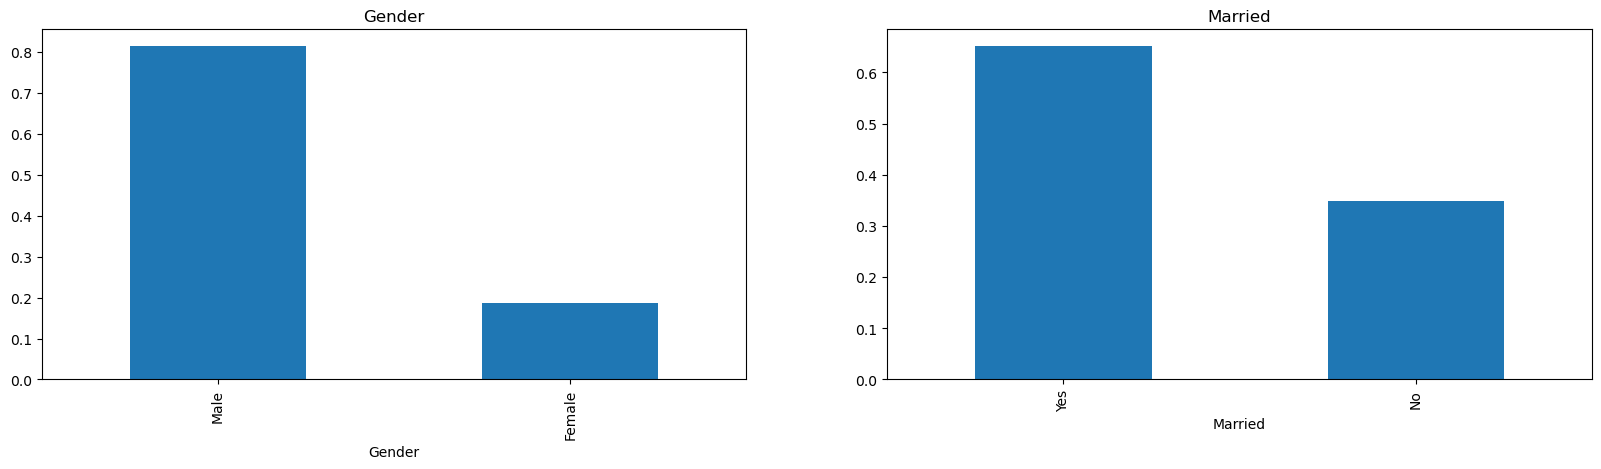

In [15]:
 plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title='Married')



<Axes: title={'center': 'Credit'}, xlabel='Credit_History'>

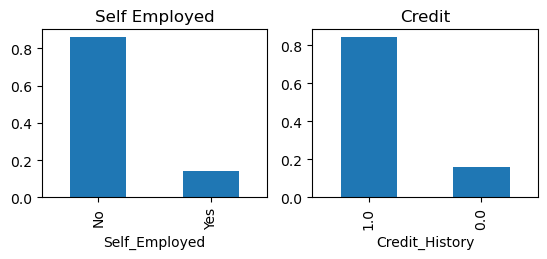

In [16]:
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit')

In [17]:
percentage_employed=train['Self_Employed'].value_counts(normalize=True)

In [18]:
percentage_repaid=train['Credit_History'].value_counts(normalize=True)

In [19]:
percentage_gender=train['Gender'].value_counts(normalize=True)

In [20]:
percentage_married=train["Married"].value_counts(normalize=True)

In [21]:
print('Employed',percentage_employed)
print('Repaid',percentage_repaid)
print('gender',percentage_gender)
print('Married',percentage_married)

Employed Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
Repaid Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64
gender Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
Married Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64



- **Male Applicants**: 81% of the applicants in the dataset are male.
- **Married Applicants**: Around 65% of the applicants in the dataset are married.
- **Self-Employed Applicants**: Around 14% of the applicants in the dataset are self-employed.
- **Debt Repayment**: Around 84% of the applicants have repaid their debts.
  These points provide a demographic overview of the applicants in the dataset.

In [22]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
train['Dependents'].value_counts(normalize=True)

Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64

In [24]:
train['Property_Area'].value_counts(normalize=True)

Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64

In [25]:
train['Education'].value_counts(normalize=True)

Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64


- **Dependents**: Most of the applicants do not have any dependents.
- **Education**: Around 80% of the applicants are graduates.
- **Property Area**: Most of the applicants are from semiurban areas.


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

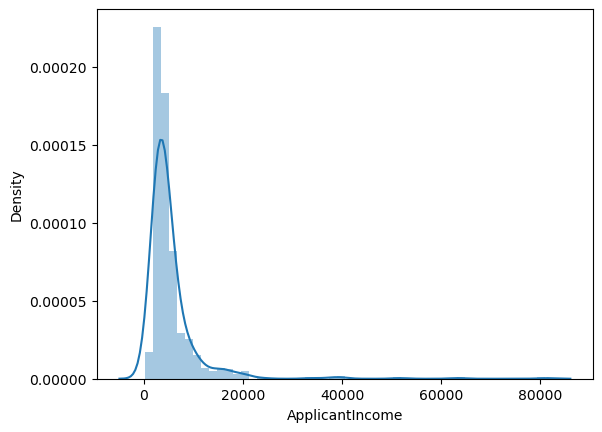

In [26]:
sns.distplot(train['ApplicantIncome'])

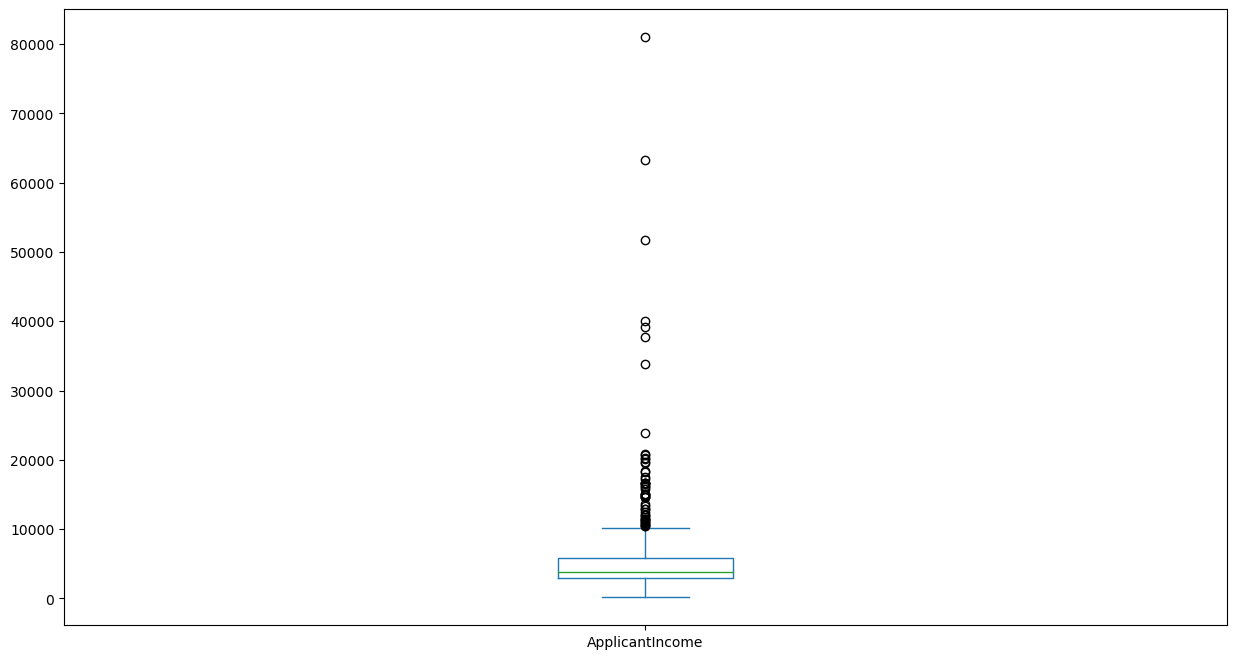

In [27]:
train['ApplicantIncome'].plot.box(figsize=(15,8))
plt.show()

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

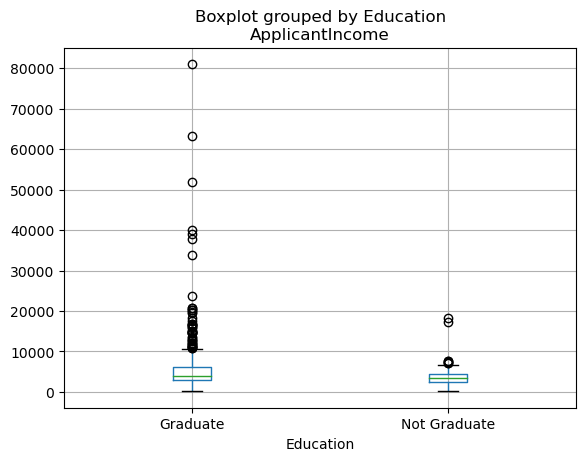

In [28]:
train.boxplot(column='ApplicantIncome',by='Education')

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

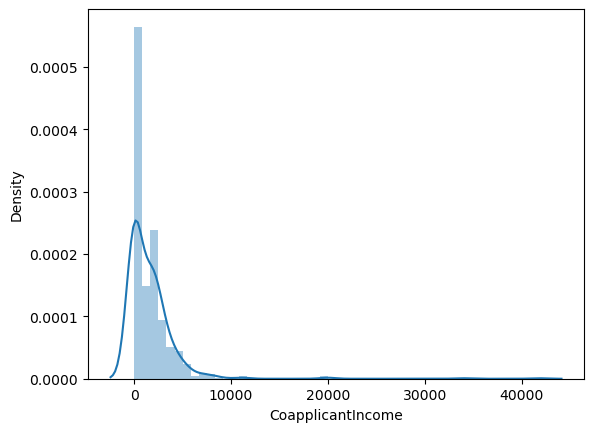

In [29]:
sns.distplot(train['CoapplicantIncome'])

<Axes: >

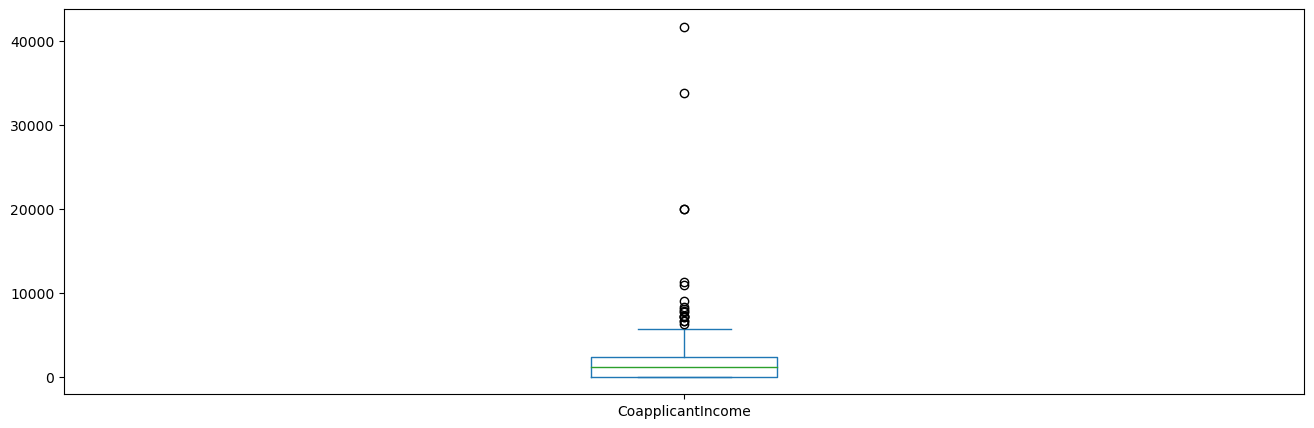

In [30]:
train['CoapplicantIncome'].plot.box(figsize=(16,5))

<Axes: xlabel='LoanAmount', ylabel='Density'>

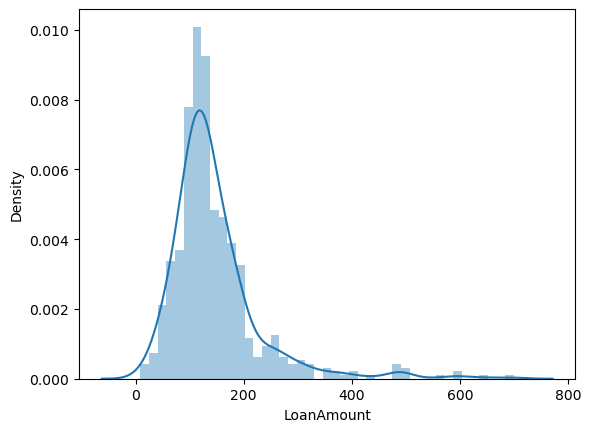

In [31]:
sns.distplot(train['LoanAmount'])

<Axes: >

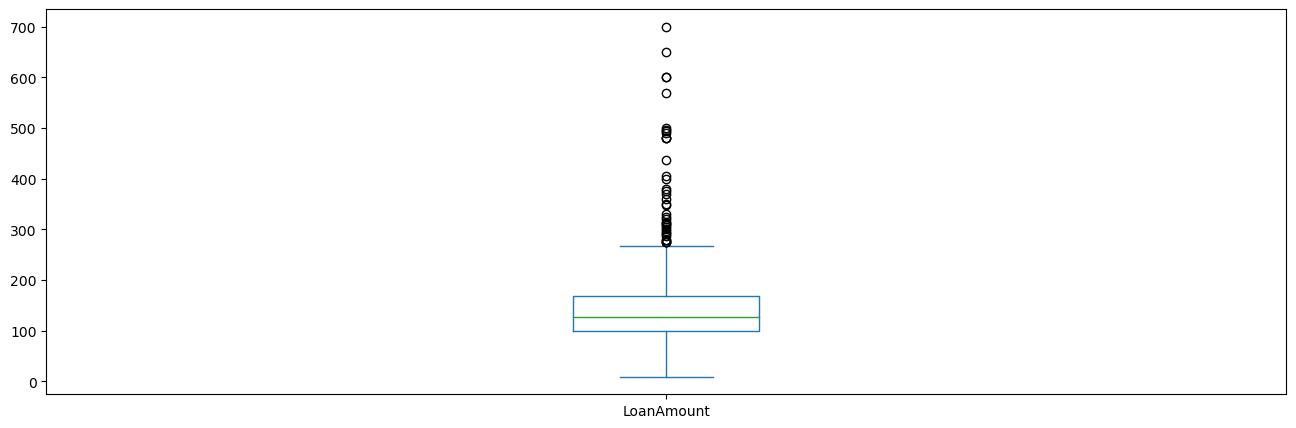

In [32]:
train['LoanAmount'].plot.box(figsize=(16,5))

- There are many outliers in the data set

In [33]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])



In [34]:
Gender.div(Gender.sum().astype(float))

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


<Axes: xlabel='Gender'>

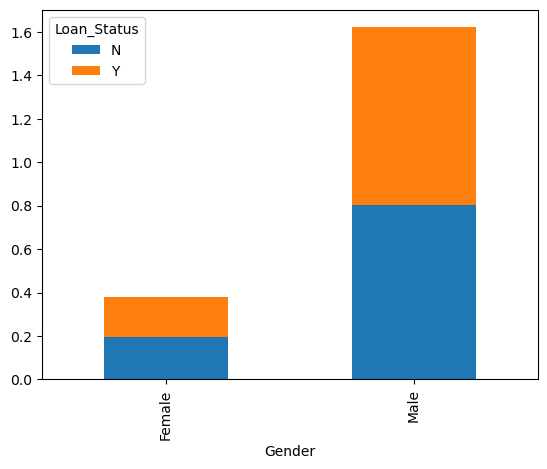

In [35]:
Gender.div(Gender.sum().astype(float)).plot(kind='bar',stacked=True)

- The data shows that there are more male applicants than female applicants.

<Axes: xlabel='Gender'>

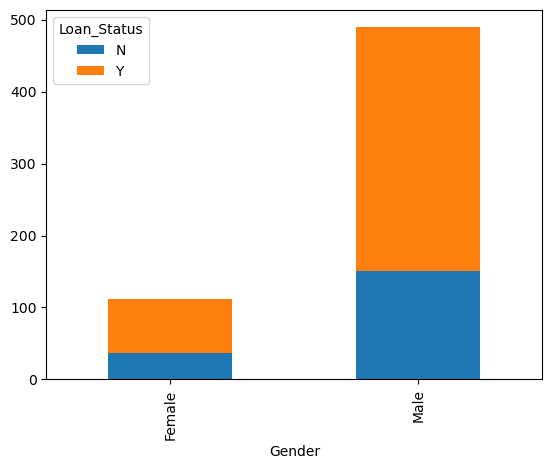

In [36]:
Gender.plot(kind='bar',stacked=True)

In [37]:
married=pd.crosstab(train['Married'],train['Loan_Status'])
depend=pd.crosstab(train['Dependents'],train['Loan_Status'])
education=pd.crosstab(train['Education'],train['Loan_Status'])
self_employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

<Axes: xlabel='Married'>

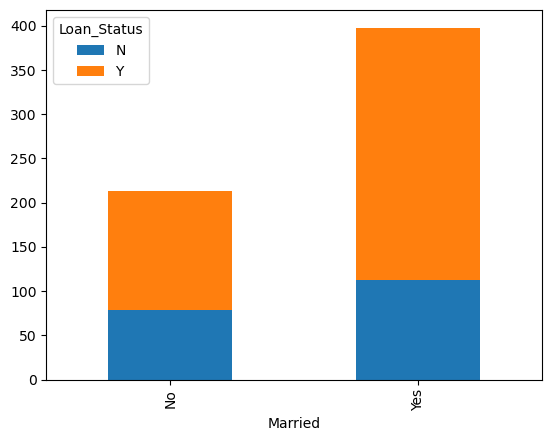

In [38]:
married.plot(kind='bar',stacked=True)

In [39]:
depend.div(depend.sum().astype(float))

Loan_Status,N,Y
Dependents,,
0,0.575269,0.576271
1,0.193548,0.159806
2,0.134409,0.184019
3+,0.096774,0.079903


<Axes: xlabel='Dependents'>

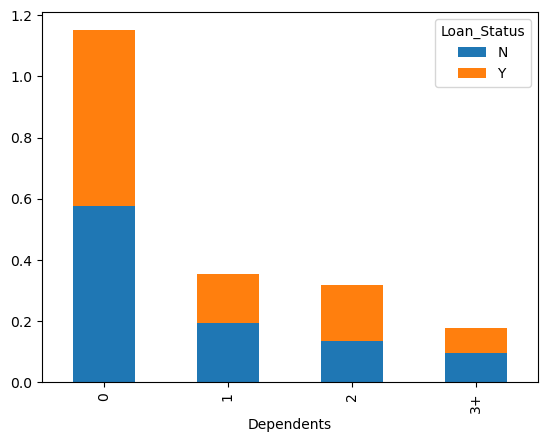

In [40]:
depend.div(depend.sum().astype(float)).plot(kind='bar',stacked=True)

In [41]:
married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<Axes: xlabel='Married'>

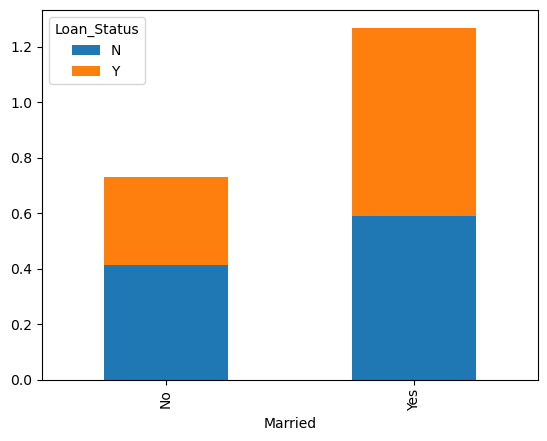

In [42]:
married.div(married.sum().astype(float)).plot(kind='bar',stacked=True)

<Axes: xlabel='Education'>

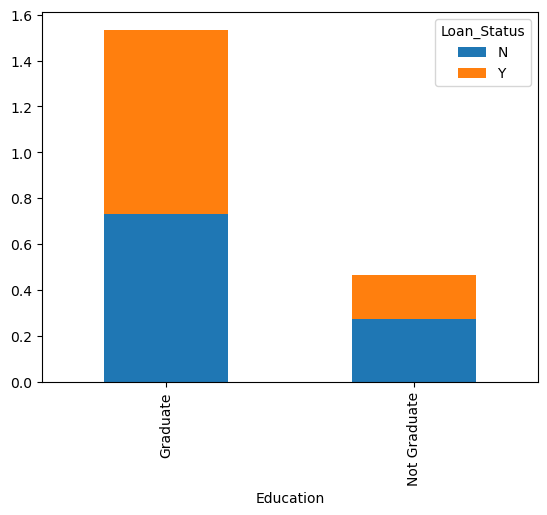

In [43]:
education.div(education.sum().astype(float)).plot(kind='bar',stacked=True)

<Axes: xlabel='Self_Employed'>

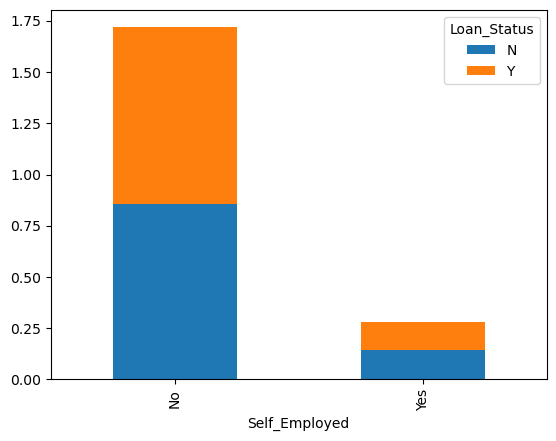

In [44]:
self_employed.div(self_employed.sum().astype(float)).plot(kind='bar',stacked=True)


- **Marital Status**: The proportion of married applicants is higher for approved loans.
- **Dependents**: The distribution of applicants with 1 or 3+ dependents is similar across both categories of loan status.
- **Employment Status**: There is nothing significant that can be inferred from the Self-Employed vs Loan Status plot.


In [45]:
train['Property_Area']

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [46]:
property_area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

<Axes: xlabel='Property_Area'>

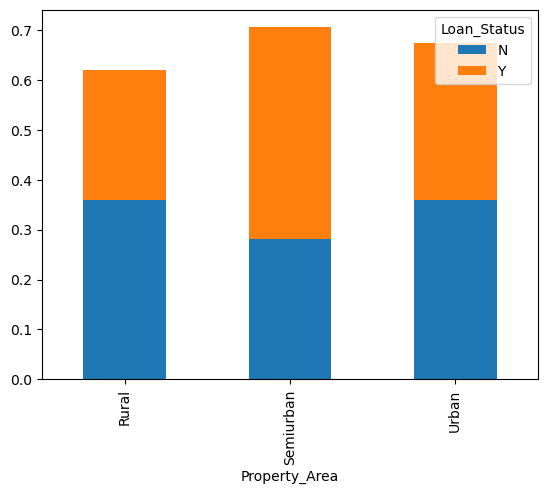

In [47]:
property_area.div(property_area.sum().astype(float)).plot(kind='bar',stacked=True)

In [48]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
credit=pd.crosstab(train['Credit_History'],train['Loan_Status'])

<Axes: xlabel='Credit_History'>

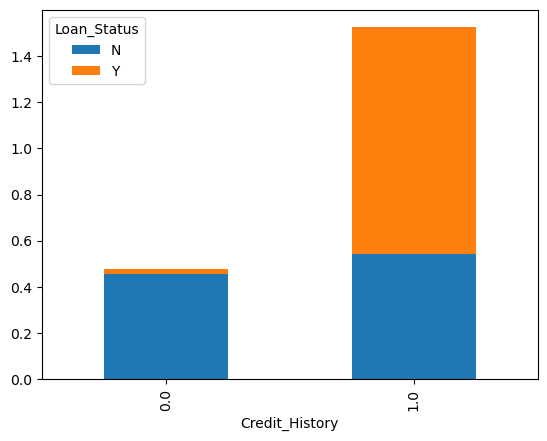

In [50]:
credit.div(credit.sum().astype(float)).plot(kind='bar',stacked=True)

- it seems that having a credit history of 1 increases the chances of loan approval
-  it appears that lenders are more cautious in approving loans in rural and urban areas compared to semi-urban areas

In [51]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Loan_Status'>

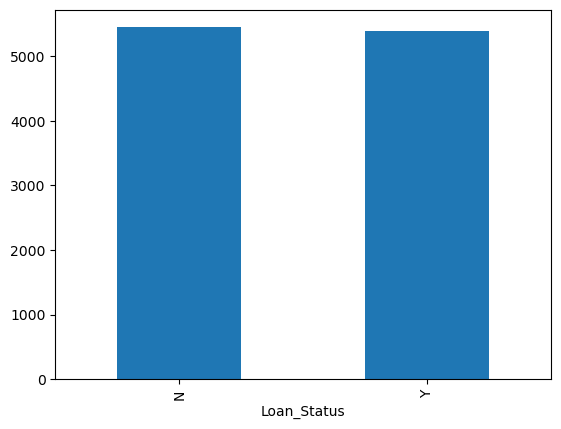

In [52]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar')

In [53]:
# we made some bins and distributed each income by their category 

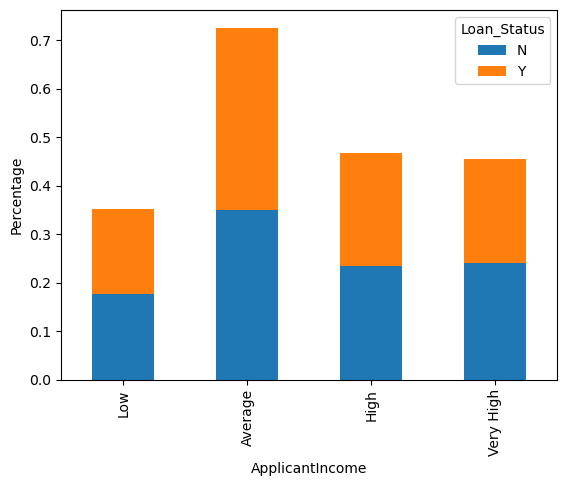

In [54]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum()).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

Applicants with average income have higher loan approval rates than those with high and very high incomes.

In [55]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_BIN']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

<Axes: xlabel='Coapplicant_Income_BIN'>

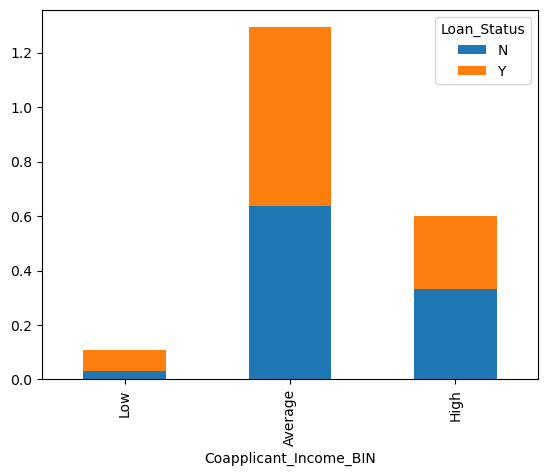

In [56]:
Coapplicant_Income_BIN=pd.crosstab(train['Coapplicant_Income_BIN'],train['Loan_Status'])
Coapplicant_Income_BIN.div(Coapplicant_Income_BIN.sum().astype(float)).plot(kind='bar',stacked=True)

- Loan approval appears to be higher when the coapplicant’s income is Average

In [57]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High',"Very High"]
train['total_income_bin']=pd.cut(train['total_income'],bins,labels=group)

<Axes: xlabel='total_income_bin'>

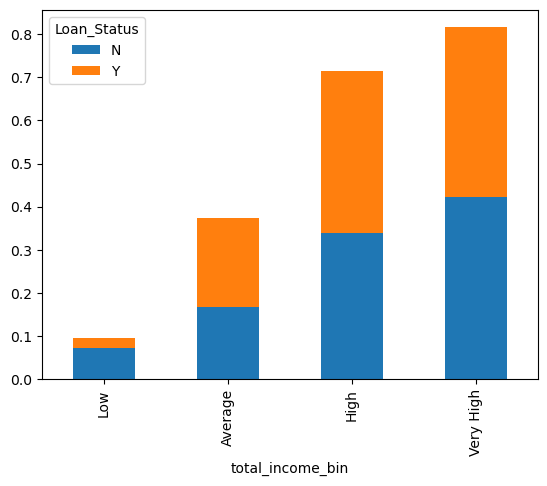

In [58]:
total_income_bin=pd.crosstab(train['total_income_bin'],train['Loan_Status'])
total_income_bin.div(total_income_bin.sum().astype(float)).plot(kind='bar',stacked=True)

- We can see that the approval rate for loans is lower for applicants with low total income compared to those with average, high, or very high income.

In [59]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_BIN', 'total_income',
       'total_income_bin'],
      dtype='object')

In [60]:
bins=[0,100,200,700]
group=['Low','Average','High']


In [61]:
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

In [62]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

<Axes: xlabel='LoanAmount_bin'>

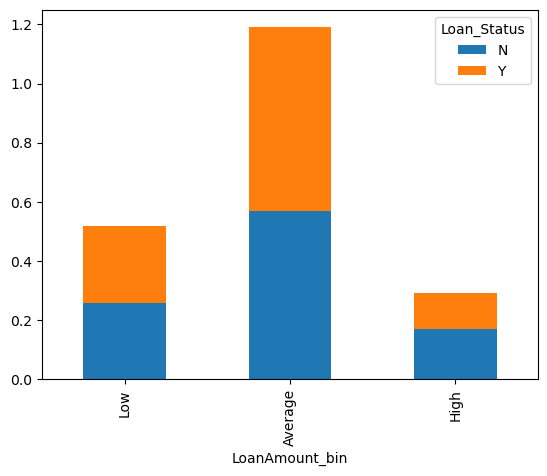

In [63]:
LoanAmount_bin.div(LoanAmount_bin.sum().astype(float)).plot(kind='bar',stacked=True)

- loan approval rates are higher for low and average loan amounts compared to high loan amounts. This supports the hypothesis that lower loan amounts have a higher chance of approval

In [64]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

**now lets change the 3+ into 3 to  make it numerical for better correlation**

In [65]:
train=train.drop(['Income_bin','Coapplicant_Income_BIN','total_income','total_income_bin','LoanAmount_bin'],axis=1)

In [66]:
train['Dependents'].replace('3+',3,inplace=True)

In [67]:
test['Dependents'].replace('3+',3,inplace=True)


In [68]:
train['Loan_Status'].replace('N',0,inplace=True)

In [69]:
train['Loan_Status'].replace('Y',1,inplace=True)

In [70]:
train=='LP001002'

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
train.eq('LP001002').any()

Loan_ID               True
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [72]:
train[train['Loan_ID']=='LP001002']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1


In [73]:
train['Loan_ID']

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [74]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [75]:
matrix_columns=train[['Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Loan_Status']]

In [76]:
matrix=matrix_columns.corr()

<Axes: >

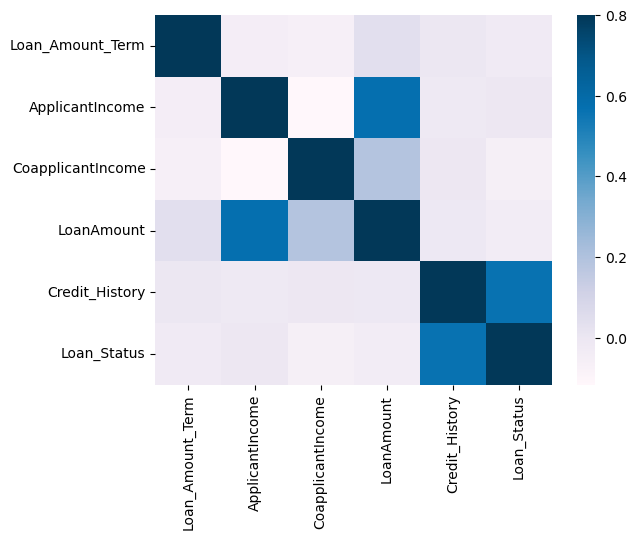

In [77]:
sns.heatmap(matrix,vmax=.8,cmap='PuBu')

-  Loan Amount and Loan Amount Term have some relationship, meaning that the amount of loan and the duration of repayment may affect each other
- Credit History and Loan Status have some association, meaning that the previous credit behavior and the outcome of the loan application may be relate

# Outliers 

In [78]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

In [80]:
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [81]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [82]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

we have to use median instead of mean.The reason for this is the presence of outliers in the *LoanAmount*  data, which can significantly affect the mean. Using the median, which is less sensitive to outliers, can therefore provide a more accurate imputation.

In [83]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [84]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [85]:
# doing the same for test data set
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

due to outliers, the bulk of the data in the ‘LoanAmount’ variable is at the left, causing right skewness. Log transformation is suggested as a solution because it doesn’t affect smaller values much but reduces larger ones. 

In [86]:
train['Loan_Amount_log']=np.log(train['LoanAmount'])

In [87]:
test['Loan_Amount_log']=np.log(train['LoanAmount'])

<Axes: >

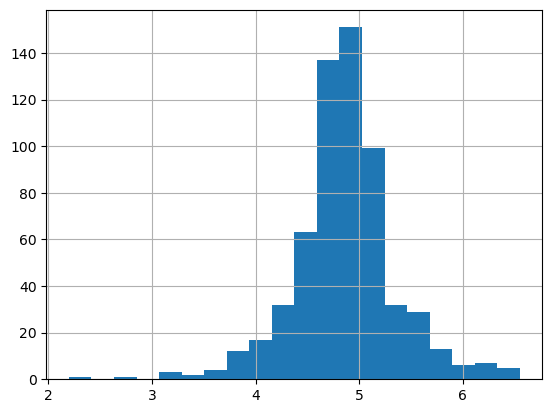

In [88]:
train['Loan_Amount_log'].hist(bins=20)

the distribution looks like Normal Distribution 

# Machine Model


In [89]:
train=train.drop('Loan_ID',axis=1)

In [90]:
test=test.drop('Loan_ID',axis=1)

In [91]:
x=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [92]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Amount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [93]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [94]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [95]:
x=x.astype(int)

In [96]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,128,360,1,4,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508,128,360,1,4,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0,66,360,1,4,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358,120,360,1,4,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0,141,360,1,4,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,4,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0,40,180,1,3,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240,253,360,1,5,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0,187,360,1,5,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [97]:
from sklearn.model_selection import train_test_split


In [98]:
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
lr=LogisticRegression()

In [101]:
lr.fit(x_train,y_train)

LogisticRegression()

In [102]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='libliner',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='libliner')

In [103]:
pred_cv=lr.predict(x_cv)

In [104]:
accuracy_score(y_cv,pred_cv)

0.7513513513513513

In [105]:
pred_test=lr.predict(test)

In [106]:
pred_test.shape


(367,)

In [107]:
submission=pd.read_csv('sample_submission_49d68Cx.csv')

In [108]:
submission['Loan_Status']=pred_test

In [109]:
submission['Loan_ID']=test_og['Loan_ID']

In [110]:
submission['Loan_Status'].replace('0','N',inplace=True)
submission['Loan_Status'].replace('1','Y',inplace=True)

In [111]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [112]:
from sklearn.model_selection import StratifiedKFold

In [113]:
i=1 
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

- This process is repeated for each fold, providing a robust measure of the model’s performance that’s less sensitive to the particular arrangement of the data. The final accuracy score is the average of the accuracy scores from each fold. This method is commonly used in machine learning to evaluate the performance of a model. It helps in understanding how well the model will generalize to unseen data.

In [114]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print("{0} of kfold {1}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test1=model.predict(xvl)
    score1=accuracy_score(yvl,pred_test1)
    print('accuracy_score',score1)
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.7967479674796748
1 of kfold 5
accuracy_score 0.8048780487804879
1 of kfold 5
accuracy_score 0.7479674796747967
1 of kfold 5
accuracy_score 0.8048780487804879
1 of kfold 5
accuracy_score 0.8032786885245902


In [115]:
from sklearn import metrics 

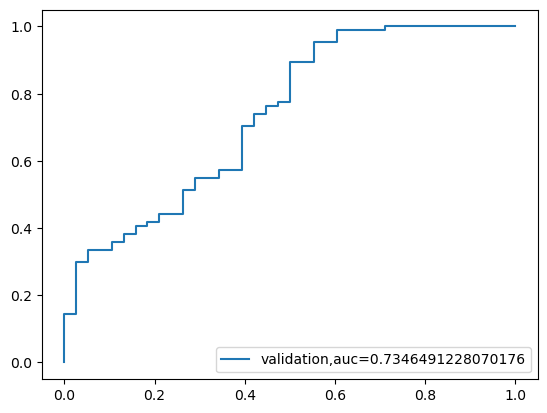

In [116]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.plot(fpr,tpr,label='validation,auc='+str (auc))
plt.legend(loc=4)

In [117]:
submission['Loan_Status']=pred_test

In [118]:
submission['Loan_ID']=test_og['Loan_ID']

In [119]:
submission['Loan_ID'].replace(0,'N',inplace=True)
submission['Loan_ID'].replace(1,'Y',inplace=True)

In [120]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

# Feature Engiennering

In [121]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_Amount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [122]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<Axes: xlabel='Total_Income', ylabel='Density'>

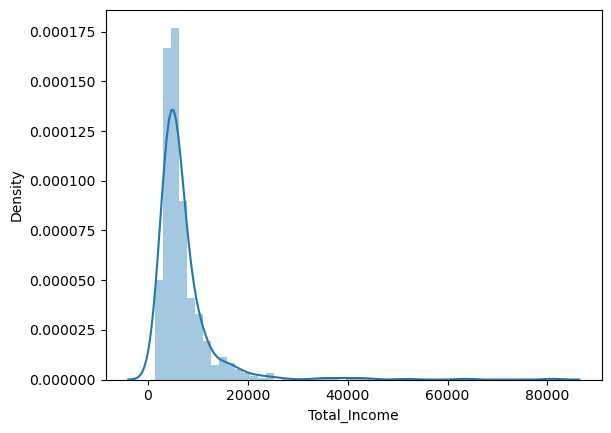

In [123]:
sns.distplot(train['Total_Income'])

In [124]:
train['Total_Income_Log']=np.log(train['Total_Income'])
test['Total_Income_Log']=np.log(train['Total_Income'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

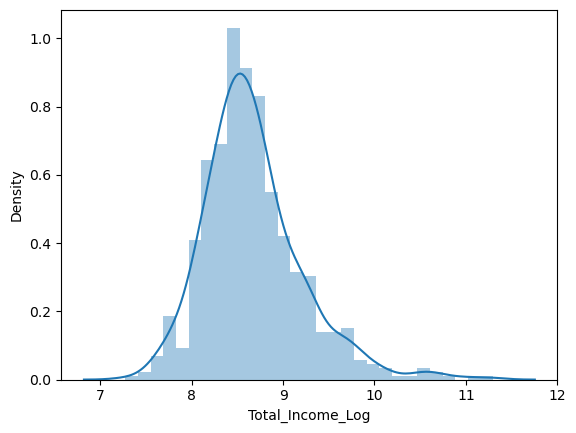

In [125]:
sns.distplot(train['Total_Income_Log'])

In [126]:
train.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log
0,5849,0.0,128.0,360.0,1.0,1,4.852030,False,True,True,...,False,True,False,True,False,False,False,True,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,False,True,False,...,False,True,False,True,False,True,False,False,6091.0,8.714568
2,3000,0.0,66.0,360.0,1.0,1,4.189655,False,True,False,...,False,True,False,False,True,False,False,True,3000.0,8.006368
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,False,True,False,...,False,False,True,True,False,False,False,True,4941.0,8.505323
4,6000,0.0,141.0,360.0,1.0,1,4.948760,False,True,True,...,False,True,False,True,False,False,False,True,6000.0,8.699515


In [127]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']


In [128]:
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']


In [129]:
train['Balance Income']=train['Total_Income']-train['EMI']*1000

In [130]:
test['Balance Income']=test['Total_Income']-test['EMI']*1000

<Axes: xlabel='Balance Income', ylabel='Density'>

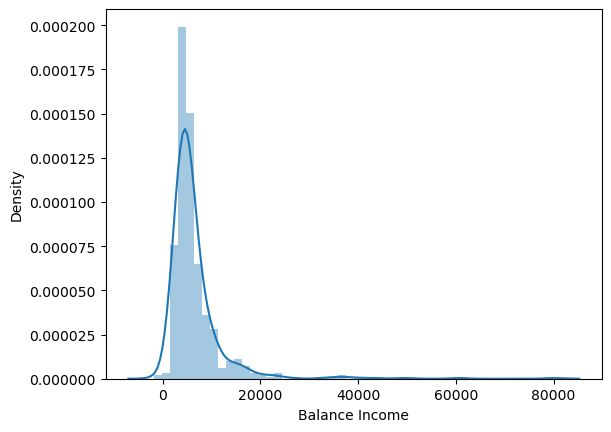

In [131]:
sns.distplot(train['Balance Income'])

In [132]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,False,True,True,...,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,False,True,False,...,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,False,True,False,...,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,False,True,False,...,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,False,True,True,...,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [133]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_Amount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_Income', 'Total_Income_Log', 'EMI',
       'Balance Income'],
      dtype='object')

In [134]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)

In [135]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)

In [136]:
train.head()

,Credit_History,Loan_Status,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log,EMI,Balance Income
0,1.0,1,4.852030,False,True,True,False,False,True,False,...,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,False,True,False,True,False,False,True,...,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,False,True,False,True,False,True,False,...,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,False,True,False,True,False,True,False,...,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,False,True,True,False,False,True,False,...,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [137]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Amount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [138]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [139]:
test

,Credit_History,Loan_Amount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_Log,EMI,Balance Income
0,1.0,4.852030,False,True,False,True,False,True,False,False,...,False,True,False,False,False,True,5720,8.674026,0.305556,5414.444444
1,1.0,4.852030,False,True,False,True,False,False,True,False,...,False,True,False,False,False,True,4576,8.714568,0.350000,4226.000000
2,1.0,4.189655,False,True,False,True,False,False,False,True,...,False,True,False,False,False,True,6800,8.006368,0.577778,6222.222222
3,1.0,4.787492,False,True,False,True,False,False,False,True,...,False,True,False,False,False,True,4886,8.505323,0.277778,4608.222222
4,1.0,4.948760,False,True,True,False,False,True,False,False,...,True,True,False,False,False,True,3276,8.699515,0.216667,3059.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,4.867534,False,True,False,True,True,False,False,False,...,True,False,True,False,False,True,5786,8.865453,0.313889,5472.111111
363,1.0,4.553877,False,True,False,True,False,True,False,False,...,False,True,False,False,False,True,4867,8.707152,0.319444,4547.555556
364,1.0,4.948760,False,True,True,False,False,True,False,False,...,False,True,False,False,True,False,5243,8.827908,0.350000,4893.000000
365,1.0,4.890349,False,True,False,True,False,True,False,False,...,False,True,False,True,False,False,7393,8.734882,0.438889,6954.111111


# Stratified Kfold

In [140]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
model.fit(xtr,ytr)
pred_test2=model.predict(xvl)
score2=accuracy_score(yvl,pred_test2)
print('accuracy_score',score2)
i+=1
pred_test=model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.680327868852459


In [141]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [142]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [143]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('log2.csv')

# Decison Tree

In [144]:
from sklearn import tree

In [145]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test3=model.predict(xvl)
score3=accuracy_score(yvl,pred_test3)
print('accuracy_score',score3)
i+=1
pred_test=model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.6721311475409836


In [146]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [147]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [148]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('DecsionTree.csv')

# Random Forest Classifier 

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1)
model.fit(xtr,ytr)
pred_test4=model.predict(xvl)
score4=accuracy_score(yvl,pred_test4)
print('accuracy_score',score4)
i+=1
pred_test=model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7540983606557377


In [151]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [152]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [153]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

# Grid search

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [156]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(x,y,test_size=0.3,random_state=1)

In [158]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [159]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [160]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
model.fit(xtr,ytr)
pred_test5=model.predict(xvl)
score5=accuracy_score(yvl,pred_test5)
print('accuracy_score',score5)
i+=1
pred_test=model.predict(test)
pred2=model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7786885245901639


In [161]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

In [162]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [163]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv')

<Axes: >

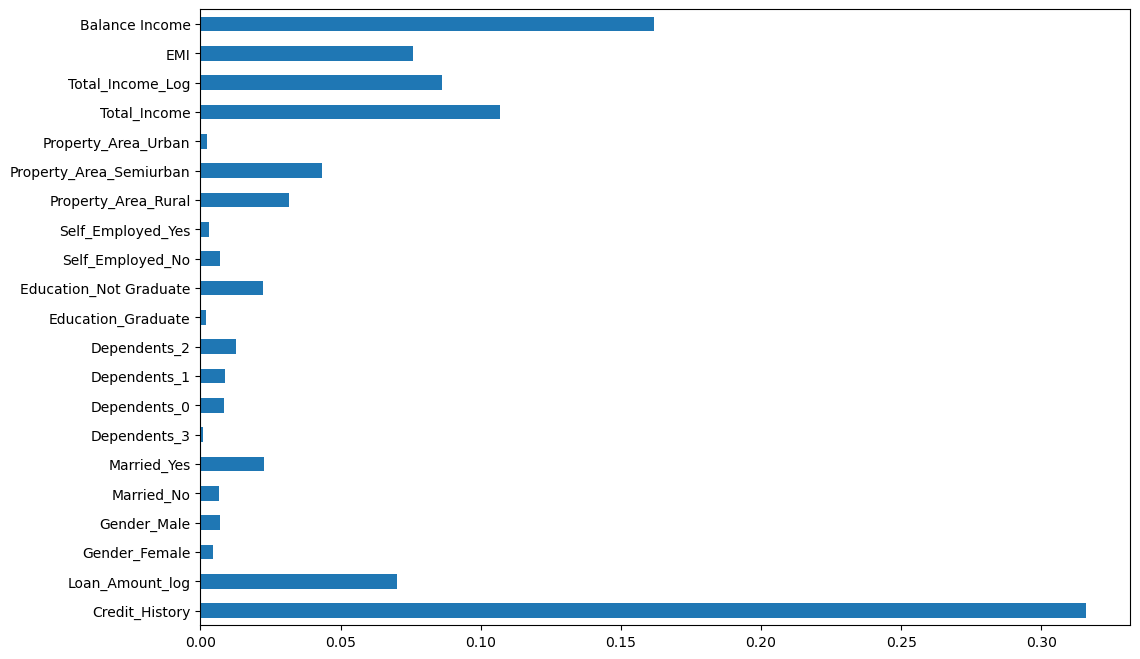

In [164]:
imp=pd.Series(model.feature_importances_,index=x.columns)
imp.plot(kind='barh',figsize=(12,8))

# XGB Boost

In [165]:
from xgboost import XGBClassifier 

In [166]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y[test_index]
    model=XGBClassifier(max_depth=4,n_estimators=50)
model.fit(xtr,ytr)
pred_test6=model.predict(xvl)
score6=accuracy_score(yvl,pred_test6)
print('accuracy_score',score6)
i+=1
pred_test=model.predict(test)
pred3=model.predict_proba(test)[:,1]


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7704918032786885


In [167]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGBboost.csv')

# Accuracy Score

In [176]:
print('Logostic Regression Accuracy ||',score1)
print('='*100)
print('Kfold Accuracy ||',score2)
print('='*100)
print('Decision Tree ||',score3)
print('='*100)
print('Random Forest ||',score4)
print('='*100)
print('After Grid Search Random Forest ||',score5)
print('='*100)
print('XGB Boost ||',score6)
print('='*100)

Logostic Regression Accuracy || 0.8032786885245902
Kfold Accuracy || 0.680327868852459
Decision Tree || 0.6721311475409836
Random Forest || 0.7540983606557377
After Grid Search Random Forest || 0.7786885245901639
XGB Boost || 0.7704918032786885
